In [103]:
from PIL import Image
import os, glob, numpy as np
from sklearn.model_selection import train_test_split

caltech_dir = "C://team/train"
categories = ["pomeranian", "shihtzu","Border collie","Welsh corgi","Husky","Doberman"]
nb_classes = len(categories)

image_w = 64
image_h = 64

pixels = image_h * image_w * 3

X = []
y = []

for idx, cat in enumerate(categories):
    
    #one-hot 돌리기.
    label = [0 for i in range(nb_classes)]
    label[idx] = 1

    image_dir = caltech_dir + "/" + cat
    files = glob.glob(image_dir+"/*.jpg")
    print(cat, " 파일 길이 : ", len(files))
    for i, f in enumerate(files):
        img = Image.open(f)
        img = img.convert("RGB")
        img = img.resize((image_w, image_h))
        data = np.asarray(img)

        X.append(data)
        y.append(label)

        if i % 700 == 0:
            print(cat, " : ", f)

X = np.array(X)
y = np.array(y)
#1 0 0 0 이면 airplanes

#0 1 0 0 이면 buddha 이런식


X_train, X_test, y_train, y_test = train_test_split(X, y)
xy = (X_train, X_test, y_train, y_test)
np.save("C://numpy_data/multi_image_data.npy", xy)


pomeranian  파일 길이 :  979
pomeranian  :  C://team/train/pomeranian\12.jpg
pomeranian  :  C://team/train/pomeranian\다운로드 - 2020-05-15T180036.822.jpg
shihtzu  파일 길이 :  1002
shihtzu  :  C://team/train/shihtzu\1.jpg
shihtzu  :  C://team/train/shihtzu\다운로드 - 2020-05-15T180923.821.jpg
Border collie  파일 길이 :  489
Border collie  :  C://team/train/Border collie\asd.jpg
Welsh corgi  파일 길이 :  447
Welsh corgi  :  C://team/train/Welsh corgi\images (10).jpg
Husky  파일 길이 :  1034
Husky  :  C://team/train/Husky\5-1.jpg
Husky  :  C://team/train/Husky\다운로드 - 2020-05-17T110916.890.jpg
Doberman  파일 길이 :  1102
Doberman  :  C://team/train/Doberman\6-1.jpg
Doberman  :  C://team/train/Doberman\다운로드 - 2020-05-17T111258.824.jpg


In [104]:
import os, glob, numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import keras.backend.tensorflow_backend as K

import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)
np_load_old = np.load
X_train, X_test, y_train, y_test = np.load('C://numpy_data/multi_image_data.npy',allow_pickle=True)
print(X_train.shape)
print(X_train.shape[0])

(3789, 64, 64, 3)
3789


In [105]:
categories = ["pomeranian", "shihtzu","Border collie","Welsh corgi","Husky","Doberman"]
nb_classes = len(categories)

#일반화
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

In [106]:
with K.tf_ops.device('/device:CPU:0'):
    model = Sequential()
    model.add(Conv2D(32, (3,3), padding="same", input_shape=X_train.shape[1:], activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(64, (3,3), padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nb_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model_dir = './model'
    
    if not os.path.exists(model_dir):
        os.mkdir(model_dir)
    
    model_path = model_dir + '/multi_img_classification.model'
    checkpoint = ModelCheckpoint(filepath=model_path , monitor='val_loss', verbose=1, save_best_only=True)
    early_stopping = EarlyStopping(monitor='val_loss', patience=6)

In [107]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_28 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 16384)           

In [108]:
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test), callbacks=[checkpoint, early_stopping])

Train on 3789 samples, validate on 1264 samples
Epoch 1/10
3789/3789 [==============================] - 23s 6ms/step - loss: 1.7531 - accuracy: 0.2724 - val_loss: 1.5310 - val_accuracy: 0.4130

Epoch 00001: val_loss improved from inf to 1.53101, saving model to ./model/multi_img_classification.model
Epoch 2/10
3789/3789 [==============================] - 23s 6ms/step - loss: 1.4388 - accuracy: 0.4524 - val_loss: 1.3783 - val_accuracy: 0.5040

Epoch 00002: val_loss improved from 1.53101 to 1.37835, saving model to ./model/multi_img_classification.model
Epoch 3/10
3789/3789 [==============================] - 23s 6ms/step - loss: 1.2699 - accuracy: 0.5323 - val_loss: 1.2018 - val_accuracy: 0.5696

Epoch 00003: val_loss improved from 1.37835 to 1.20184, saving model to ./model/multi_img_classification.model
Epoch 4/10
3789/3789 [==============================] - 24s 6ms/step - loss: 1.1331 - accuracy: 0.5846 - val_loss: 1.1190 - val_accuracy: 0.5957

Epoch 00004: val_loss improved from 1.2

In [109]:
print("정확도 : %.4f" % (model.evaluate(X_test, y_test)[1]))

1264/1264 [==============================] - 1s 1ms/step
정확도 : 0.6875


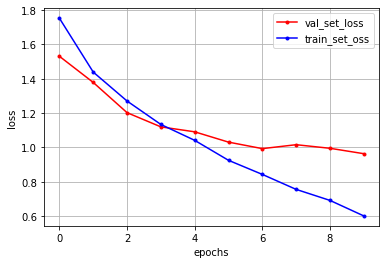

In [110]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='val_set_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='train_set_oss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

In [111]:
from PIL import Image
import os, glob, numpy as np
from keras.models import load_model

caltech_dir = "C://multi_img_data/imgs_others_test"
image_w = 64
image_h = 64

pixels = image_h * image_w * 3

X = []
filenames = []
files = glob.glob(caltech_dir+"/*.*")
for i, f in enumerate(files):
    img = Image.open(f)
    img = img.convert("RGB")
    img = img.resize((image_w, image_h))
    data = np.asarray(img)
    filenames.append(f)
    X.append(data)

X = np.array(X)
model = load_model('./model/multi_img_classification.model')

prediction = model.predict(X)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
cnt = 0

#이 비교는 그냥 파일들이 있으면 해당 파일과 비교. 카테고리와 함께 비교해서 진행하는 것은 _4 파일.
for i in prediction:
    pre_ans = i.argmax()  # 예측 레이블
    print(i)
    print(pre_ans)
    pre_ans_str = ''
    if pre_ans == 0: pre_ans_str = "포메라니안"
    elif pre_ans == 1: pre_ans_str = "시츄"
    elif pre_ans == 2: pre_ans_str = "보더콜리"
    elif pre_ans == 3: pre_ans_str = "웰시코기"
    elif pre_ans == 4: pre_ans_str = "허스키"        
    else: pre_ans_str = "도베르만"
    if i[0] >= 0.8 : print("해당 "+filenames[cnt].split("\\")[1]+"이미지는 "+pre_ans_str+"로 추정됩니다.")
    if i[1] >= 0.8: print("해당 "+filenames[cnt].split("\\")[1]+"이미지는 "+pre_ans_str+"으로 추정됩니다.")
    if i[2] >= 0.8: print("해당 "+filenames[cnt].split("\\")[1]+"이미지는 "+pre_ans_str+"로 추정됩니다.")
    if i[3] >= 0.8: print("해당 "+filenames[cnt].split("\\")[1]+"이미지는 "+pre_ans_str+"로 추정됩니다.")
    if i[4] >= 0.8: print("해당 "+filenames[cnt].split("\\")[1]+"이미지는 "+pre_ans_str+"로 추정됩니다.")
    if i[5] >= 0.8: print("해당 "+filenames[cnt].split("\\")[1]+"이미지는 "+pre_ans_str+"로 추정됩니다.")
    cnt += 1
    # print(i.argmax()) #얘가 레이블 [1. 0. 0.] 이런식으로 되어 있는 것을 숫자로 바꿔주는 것.
    # 즉 얘랑, 나중에 카테고리 데이터 불러와서 카테고리랑 비교를 해서 같으면 맞는거고, 아니면 틀린거로 취급하면 된다.
    # 이걸 한 것은 _4.py에.

[1.000 0.000 0.000 0.000 0.000 0.000]
0
해당 1-1.jpg이미지는 포메라니안로 추정됩니다.
[1.000 0.000 0.000 0.000 0.000 0.000]
0
해당 1-2.jpg이미지는 포메라니안로 추정됩니다.
[1.000 0.000 0.000 0.000 0.000 0.000]
0
해당 1-4.jpg이미지는 포메라니안로 추정됩니다.
[0.000 1.000 0.000 0.000 0.000 0.000]
1
해당 2-1.jpg이미지는 시츄으로 추정됩니다.
[0.000 1.000 0.000 0.000 0.000 0.000]
1
해당 2-2.jpg이미지는 시츄으로 추정됩니다.
[0.000 1.000 0.000 0.000 0.000 0.000]
1
해당 2-3.jpg이미지는 시츄으로 추정됩니다.
[0.000 1.000 0.000 0.000 0.000 0.000]
1
해당 2-4.jpg이미지는 시츄으로 추정됩니다.
[0.000 0.000 1.000 0.000 0.000 0.000]
2
해당 3-1 (1).jpg이미지는 보더콜리로 추정됩니다.
[0.000 0.000 1.000 0.000 0.000 0.000]
2
해당 3-1 (2).jpg이미지는 보더콜리로 추정됩니다.
[0.000 0.000 1.000 0.000 0.000 0.000]
2
해당 3-1 (3).jpg이미지는 보더콜리로 추정됩니다.
[0.000 0.000 0.000 1.000 0.000 0.000]
3
해당 4-1.jpg이미지는 웰시코기로 추정됩니다.
[0.000 0.000 0.000 1.000 0.000 0.000]
3
해당 4-2.jpg이미지는 웰시코기로 추정됩니다.
[0.000 0.000 0.000 1.000 0.000 0.000]
3
해당 4-3.jpg이미지는 웰시코기로 추정됩니다.
[0.000 0.000 0.000 0.000 1.000 0.000]
4
해당 5-1.jpg이미지는 허스키로 추정됩니다.
[0.000 0.000 0.000 0.000 1.000 0.000]
